In [4]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt
import copy
from sklearn.neighbors import KNeighborsClassifier

In [5]:
with open("words_alpha.txt") as wordFile:
    words = set(wordFile.read().split())

In [6]:
pathTest = "data/test.csv"
pathTrain = "data/train.csv"
test_df = pd.read_csv(pathTest)
train_df = pd.read_csv(pathTrain)

In [7]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<h1>Data pre-processing</h1> 
<h3> One of the common method </h3>
<p> A comman pre-processing for NLP problem domains involves: 
    <ol> 
        <li> Data cleaning 
            <ul> 
                <li> Dealing with null values </li>
                <li> Dealing with unnecessary data in string </li>
            </ul>
        </li>
        <li> Tokenization </li>
        <li> Document to term matrix </li>
    </ol>
</p>

<p> Some of the common data cleaning methods are: 
    <ul> 
        <li> Remove stop words ("a", "is", ....) </li>
        <li> Remove punctuations </li>
        <li> Remove numbers (In our case this might not be benificail) </li> 
        <li> Remove unnecessary symbols (In our case we cannot remove <b> # </b>) </li> 
        <li> Make all of them lower case </li> 
        <li> <b> DEAL WITH THE NULL KEYWORDS AND LOCATIONS </b> </li>
    </ul>
    But since we really don't know a lot about the data we might not do certain things in order to learn the benefits of them in our EDA process
</p>
        

In [8]:
sample_train_df = copy.deepcopy(train_df)

In [9]:
#Checking for tags or null values
keywordNull = sample_train_df.keyword.isna()
hashtags = sample_train_df['text'].str.find("#") != -1
otherUserTag = sample_train_df['text'].str.find("@") != -1
webLink = sample_train_df['text'].str.find("http") != -1

#Adding new columns to the list

sample_train_df["contains_hashtags"] = hashtags
sample_train_df["contains_usertags"] = otherUserTag
sample_train_df["contains_weblink"] = webLink
sample_train_df["keywordNull"] = keywordNull
sample_train_df

,id,keyword,location,text,target,contains_hashtags,contains_usertags,contains_weblink,keywordNull
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,True,False,False,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False,False,False,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False,False,False,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,True,False,False,True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,False,False,True,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False,True,False,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,False,False,True,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False,False,False,True


In [10]:
a = sample_train_df.contains_hashtags.astype(int).to_numpy()
a = a.reshape(len(a),1)
a

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [11]:
symbols = "!\"$%&'*+,-./:;?[\]^_`{|}~#@"
numbers = "0123456789"
for symbol in symbols:
    symbol = "\\" + symbol
    sample_train_df['text'] = sample_train_df['text'].str.replace(symbol," ")
    sample_train_df['keyword'] = sample_train_df['keyword'].str.replace(symbol," ")
for number in numbers:
    sample_train_df['text'] = sample_train_df['text'].str.replace(number,"")
    sample_train_df['keyword'] = sample_train_df['keyword'].str.replace(number," ")
sample_train_df

,id,keyword,location,text,target,contains_hashtags,contains_usertags,contains_weblink,keywordNull
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake M...,1,True,False,False,True
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,False,False,False,True
2,5,NaN,NaN,All residents asked to shelter in place are ...,1,False,False,False,True
3,6,NaN,NaN,people receive wildfires evacuation orders ...,1,True,False,False,True
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as ...,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,False,False,True,True
7609,10870,NaN,NaN,aria ahrary TheTawniest The out of control w...,1,False,True,False,True
7610,10871,NaN,NaN,M UTC km S of Volcano Hawaii http t co...,1,False,False,True,True
7611,10872,NaN,NaN,Police investigating after an e bike collided ...,1,False,False,False,True


<p> In the code above I have removed all symbols except <b>@ and # </b>. Which basically is what I believe, important in twitter. The regex portion of the code is from <a link="https://stackoverflow.com/questions/41425945/python-pandas-error-missing-unterminated-subpattern-at-position-2"> here </a>
</p>

<h3> Effect of removing symbols </h3>

<b> Good in some </b>

In [12]:
print(train_df.text[43])
print(sample_train_df.text[43])

SOOOO PUMPED FOR ABLAZE ???? @southridgelife
SOOOO PUMPED FOR ABLAZE       southridgelife


<b> Bad in some </b>

In [13]:
print(train_df.text[44])
print(sample_train_df.text[44])

I wanted to set Chicago ablaze with my preaching... But not my hotel! http://t.co/o9qknbfOFX
I wanted to set Chicago ablaze with my preaching    But not my hotel  http   t co oqknbfOFX


<p> <b> In this case we can completely ignore the text proceeding @ or http. </b> </p>

In [14]:
sample_train_df[sample_train_df.id == 102]

,id,keyword,location,text,target,contains_hashtags,contains_usertags,contains_weblink,keywordNull
71,102,accident,"St. Louis, MO",stlouis caraccidentlawyer Speeding Among Top...,0,True,False,True,False


<h3>The code below creates a word vector matrix of the clean data</h3>

In [15]:
document_to_Matrix = feature_extraction.text.CountVectorizer()
matrix = document_to_Matrix.fit_transform(sample_train_df.text)
matrix_feature_name = document_to_Matrix.get_feature_names()

<h3>The code below creates a word vector matrix of the un-cleaned data</h3>

In [16]:
document_to_Matrix_noClean = feature_extraction.text.CountVectorizer()
matrix_noClean = document_to_Matrix_noClean.fit_transform(train_df.text)
matrix_feature_name_noClean = document_to_Matrix_noClean.get_feature_names()

In [17]:
print(matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
newMatrix = matrix.todense()
newCol = sample_train_df.contains_hashtags.astype(int)
newCol

0       1
1       0
2       0
3       1
4       1
       ..
7608    0
7609    0
7610    0
7611    0
7612    0
Name: contains_hashtags, Length: 7613, dtype: int32

In [19]:
def validWords(feature_list):
    valid_words = 0
    feature_len = len(feature_list)
    for feature in matrix_feature_name:
        if(feature in words):
            valid_words += 1
    return [valid_words, feature_len-valid_words]

In [20]:
cleaned_data = validWords(matrix_feature_name)
noClean_data = validWords(matrix_feature_name_noClean)

<p> The following code is from <a link="https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py"> the official documentation </a> of matplotlib </p>

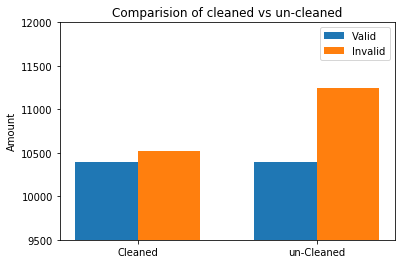

In [21]:
labels = ['Cleaned', 'un-Cleaned']
valid_words = [cleaned_data[0], noClean_data[0]]
inValid_words = [cleaned_data[1], noClean_data[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valid_words, width, label='Valid')
rects2 = ax.bar(x + width/2, inValid_words, width, label='Invalid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_ylim([9500,12000])
ax.set_title('Comparision of cleaned vs un-cleaned')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

<p> As we can see from the bar graph produced, <b> the cleaned data has fewer invalid data compared to the un-cleaned data. </b> This also shows that there is a <i>huge room for improvement </i>. </p>
<p> ***this does not imply that the data obtained after pre-processing is good. What we have done here is removed the symbols. And symbols are not words. So it's not suprising that if symbols are removed, the amount of invalid words decreases. </p>

<h2> Exploratory data analysis </h2>

<p> Here we will do some <b> Descriptive analysis </b> of the data we have obtained </p>
<p> Here's a list of aspects we will explore: 
    <ul> 
        <li> Top words </li>
        <li> keywords and disasters </li>
        <li> Relationship between twitter symbols (@, # and http links) and disasters </li>
        <li> Relationship between usage of profanity and disasters </li>
    </ul>
</p>

<b> Exsistance of links and tags </b>

In [22]:
testDataLen = len(sample_train_df)
totalTrue = 0
hashTags = 0   # "#"
links = 0      # "http"
userLinks = 0  # "@"
for dataIndex in range(testDataLen):
    data = sample_train_df.loc[dataIndex,:]
    if(data.target == 1):
        totalTrue += 1
        if(data.contains_hashtags == True):
            hashTags += 1
        if(data.contains_usertags == True):
            userLinks += 1
        if(data.contains_weblink == True):
            links += 1
        

<BarContainer object of 4 artists>

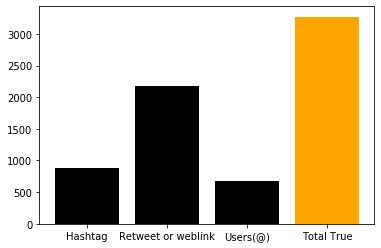

In [23]:
tagColor = "black"
totalTrueColor = "orange"
plt.bar(["Hashtag","Retweet or weblink","Users(@)","Total True"],[hashTags,links,userLinks,totalTrue],color = [tagColor,tagColor,tagColor,totalTrueColor])

<b> Interestingly, the amount of null keywords are very few (61 out of >7000 data)! </b>

In [24]:
keywordData = sample_train_df[sample_train_df.keywordNull == False]

In [25]:
keywordData = keywordData.groupby(["keyword"]).sum()
keywordData = keywordData.sort_values(by=['target'],ascending=False)
keywordData

,id,target,contains_hashtags,contains_usertags,contains_weblink,keywordNull
keyword,,,,,,
derailment,137519,39,11.0,5.0,23.0,0.0
wreckage,419629,39,5.0,3.0,33.0,0.0
outbreak,302788,39,8.0,4.0,35.0,0.0
typhoon,383114,37,6.0,5.0,30.0,0.0
debris,115672,37,15.0,3.0,32.0,0.0
...,...,...,...,...,...,...
electrocute,141501,1,1.0,10.0,4.0,0.0
epicentre,56451,1,1.0,5.0,8.0,0.0
body bags,61654,1,5.0,8.0,24.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

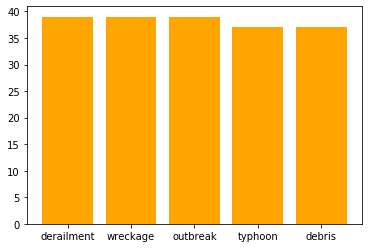

In [26]:
plt.bar(keywordData.index.tolist()[0:5],keywordData.target[0:5],color="orange")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

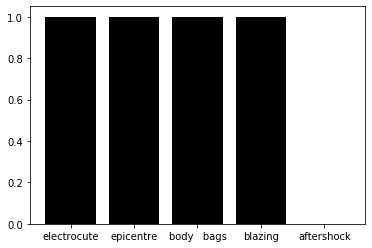

In [27]:
plt.bar(keywordData.index.tolist()[-5:],keywordData.target[-5:],color="black")
plt.show

Text(0, 0.5, 'Target')

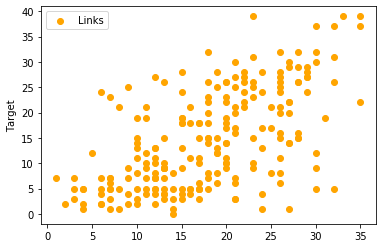

In [28]:
#plt.scatter(keywordData.contains_usertags,keywordData.target,color="black",label="user tags")
#plt.scatter(keywordData.contains_hashtags,keywordData.target,color="green",label="hashtags")
plt.scatter(keywordData.contains_weblink,keywordData.target,color="orange",label="Links")
plt.legend()
plt.ylabel("Target")

In [29]:
sample_train_df

,id,keyword,location,text,target,contains_hashtags,contains_usertags,contains_weblink,keywordNull
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake M...,1,True,False,False,True
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,False,False,False,True
2,5,NaN,NaN,All residents asked to shelter in place are ...,1,False,False,False,True
3,6,NaN,NaN,people receive wildfires evacuation orders ...,1,True,False,False,True
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as ...,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,False,False,True,True
7609,10870,NaN,NaN,aria ahrary TheTawniest The out of control w...,1,False,True,False,True
7610,10871,NaN,NaN,M UTC km S of Volcano Hawaii http t co...,1,False,False,True,True
7611,10872,NaN,NaN,Police investigating after an e bike collided ...,1,False,False,False,True


# Split the sample

In [30]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [31]:
sample_train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [32]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(sample_train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

# split the sample

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = train_vectors
y = train_df["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create the model

In [36]:
clf = linear_model.RidgeClassifier()

In [37]:
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring="f1")
scores

array([0.72556894, 0.70320856, 0.72739726])

In [38]:
clf.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [39]:
predictions = clf.predict(X_test)

# Evaluate the model

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1324
           1       0.76      0.71      0.73       960

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.78      2284
weighted avg       0.78      0.78      0.78      2284



In [42]:
print(confusion_matrix(y_test,predictions))

[[1108  216]
 [ 279  681]]


# Compare to uncleaned data

In [43]:
uncleaned_train_vectors = count_vectorizer.fit_transform(train_df["text"])
uX = uncleaned_train_vectors
uy = train_df["target"]
uX_train, uX_test, uy_train, uy_test = train_test_split(uX, uy, test_size=0.30)
clf.fit(uX_train, uy_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [44]:
predictions = clf.predict(uX_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1324
           1       0.42      0.39      0.40       960

    accuracy                           0.52      2284
   macro avg       0.50      0.50      0.50      2284
weighted avg       0.51      0.52      0.52      2284



In [46]:
print(confusion_matrix(y_test,predictions))

[[816 508]
 [589 371]]


<h3> KNN classifier </h3>

<h4> Cleaned data </h4>

In [53]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78      1324
           1       0.94      0.26      0.40       960

    accuracy                           0.68      2284
   macro avg       0.79      0.62      0.59      2284
weighted avg       0.77      0.68      0.62      2284



In [55]:
print(confusion_matrix(y_test,predictions))

[[1307   17]
 [ 713  247]]
